# K-means clustering in Python

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 01: importing the dataset


#### https://www.kaggle.com/chaandsheikh/instagram-visit-clustering

In [113]:
data = pd.read_csv('Instagram visits clustering.csv')

In [114]:
data.head(20)

User ID  Instagram visit score  Spending_rank(0 to 100)
0         0                     63                24.050708
1         1                     61                25.223290
2         2                    104                18.528245
3         3                     82                86.890232
4         4                     14                31.492397
5         5                     74                81.195314
6         6                     83                88.119729
7         7                     71                87.468356
8         8                     42                80.829564
9         9                     79                25.966622
10       10                     94                24.465674
11       11                     30                30.975041
12       12                     62                23.936884
13       13                     19                14.216564
14       14                     36                23.461313
15       15                     17                22.405137
16       16                     98                14.599989
17       17                     87                12.504275
18       18                     55                11.760720
19       19                     65                 8.782404

In [115]:
data = data.sample(frac = 1) 

## Step 02: Extraction of data

In [116]:
X = data.iloc[:, [1, 2]].values

In [117]:
X[:10]

array([[ 22.        ,  25.42124007],
       [104.        ,  18.52824526],
       [ 40.        ,  53.73012227],
       [ 14.        ,  24.68949391],
       [ 95.        ,   3.77676764],
       [ 93.        ,  19.57925395],
       [ 36.        ,  23.46131302],
       [ 75.        ,  84.07299429],
       [ 98.        ,  23.00398013],
       [ 80.        , 107.3498213 ]])

# Step 03: Use elbow method for finding optimal number of clusters

In [118]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

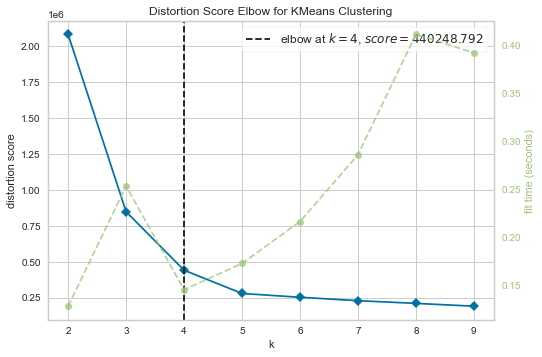

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Step 04: Apply K-means clustering

In [120]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [121]:
kmeans.labels_

array([2, 0, 3, ..., 3, 1, 0])

In [122]:
y = kmeans.predict(X)

In [123]:
y[:200]

array([2, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 2, 3,
       0, 0, 2, 2, 2, 3, 1, 1, 0, 1, 1, 0, 2, 3, 0, 0, 0, 0, 1, 3, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 1, 1, 1, 3, 1, 1, 2, 0, 2, 1, 2, 3,
       0, 0, 0, 3, 2, 0, 3, 3, 2, 1, 0, 0, 2, 3, 3, 2, 1, 1, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1,
       0, 3, 0, 3, 2, 0, 3, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 3, 3, 0, 1, 0, 1, 0, 2, 1, 3, 1, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 3, 1, 3, 1, 0, 1, 1, 2, 2, 0, 2, 1, 3,
       0, 0, 0, 2, 3, 1, 0, 1, 3, 0, 1, 2, 1, 1, 0, 0, 1, 2, 3, 3, 0, 3,
       0, 1])

## Step 05: Visualization

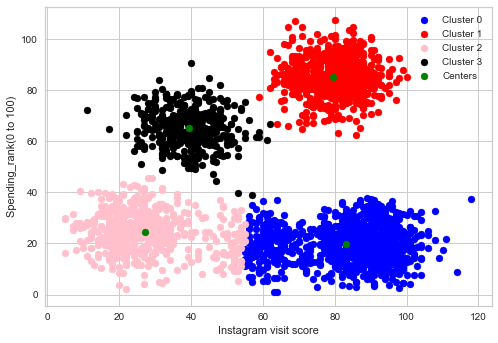

In [124]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Cluster 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='pink', label='Cluster 2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], c='black', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='green', label='Centers')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
plt.show()

# Extracting the cluster data

In [132]:
data.iloc[y == 3]

User ID  Instagram visit score  Spending_rank(0 to 100)
2238     2238                     40                53.730122
1944     1944                     44                59.237125
916       916                     33                63.690398
1021     1021                     31                59.628665
748       748                     38                68.109601
...       ...                    ...                      ...
1842     1842                     32                61.405270
2072     2072                     25                60.739357
236       236                     31                62.486815
589       589                     43                64.301579
2263     2263                     47                69.922030

[400 rows x 3 columns]